In [2]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import augment_image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Prepare all the variable

In [3]:
path_source = os.environ.get('PATH_DATASET_COMBINED')
path_dest = os.environ.get('PATH_DATASET_AUGMENTED')
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
scenario_names = ['scenario_2', 'scenario_3', 'scenario_4', 'scenario_5']
labels_name = ['normal', 'glaukoma']
image_size = {'rimone': (300,300),
            'g1020': (240,300),
            'refuge': (300,300),
            'papila': (200,300)}
image_format = {'rimone': 'png',
                'g1020': 'jpg',
                'refuge': 'jpg',
                'papila': 'jpg'}

In [24]:
path_dataset_src = {}
path_dataset_aug = {}

for dataset in dataset_names:
    path_dataset_src[dataset] = os.path.join(path_source,
                                            dataset)
del dataset

for scenario in scenario_names:
    for dataset in dataset_names:
        for label in labels_name:
            path_dataset_aug[scenario + '_'
                            + dataset
                            + '_'
                            + label] = os.path.join(path_dest,
                                                    scenario,
                                                    dataset,
                                                    label)
del scenario, dataset, label

In [22]:
datagenerator_s1 = ImageDataGenerator(
    rescale=1./255,
)
datagenerator_s2345 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[1, 1.5]
)

### Prepare Augment Directory

In [6]:
directory_result = augment_image.create_directory(path_dict=path_dataset_aug)
for key, value in directory_result.items():
    if key == 'Already Exists' and value != []:
        print('Directory already exists:', value)

### Scenario 1
no augmentation, rgb color, no clahe
#### Show Image

In [23]:
path_dataset_src

{'rimone_': 'd:\\\\Programming\\\\Python\\\\Skripsi\\\\dataset\\\\combined\\rimone',
 'g1020_': 'd:\\\\Programming\\\\Python\\\\Skripsi\\\\dataset\\\\combined\\g1020',
 'refuge_': 'd:\\\\Programming\\\\Python\\\\Skripsi\\\\dataset\\\\combined\\refuge',
 'papila_': 'd:\\\\Programming\\\\Python\\\\Skripsi\\\\dataset\\\\combined\\papila'}

In [30]:
s1_src = {}
s1_augment = 'none'
s1_col_mode = 'rgb'
for dataset in dataset_names:
    for class_used in labels_name:
        print(f'Loading {dataset} {class_used}...')
        s1_src[f"{dataset}_{class_used}"] = (datagenerator_s1.flow_from_directory(
                                        path_dataset_src[dataset],
                                        target_size=image_size[dataset],
                                        color_mode=s1_col_mode,
                                        class_mode='binary',
                                        classes=[class_used],
                                        shuffle=True,
                                        seed=1915026018))
del dataset, class_used

Loading rimone normal...
Found 313 images belonging to 1 classes.
Loading rimone glaukoma...
Found 172 images belonging to 1 classes.


Loading g1020 normal...
Found 724 images belonging to 1 classes.
Loading g1020 glaukoma...
Found 296 images belonging to 1 classes.
Loading refuge normal...
Found 1080 images belonging to 1 classes.
Loading refuge glaukoma...
Found 120 images belonging to 1 classes.
Loading papila normal...
Found 333 images belonging to 1 classes.
Loading papila glaukoma...
Found 155 images belonging to 1 classes.


Showing rimone_normal...


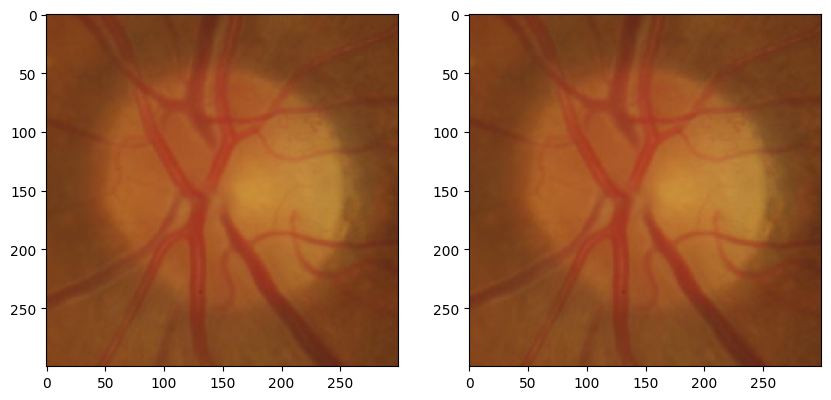

Showing rimone_glaukoma...


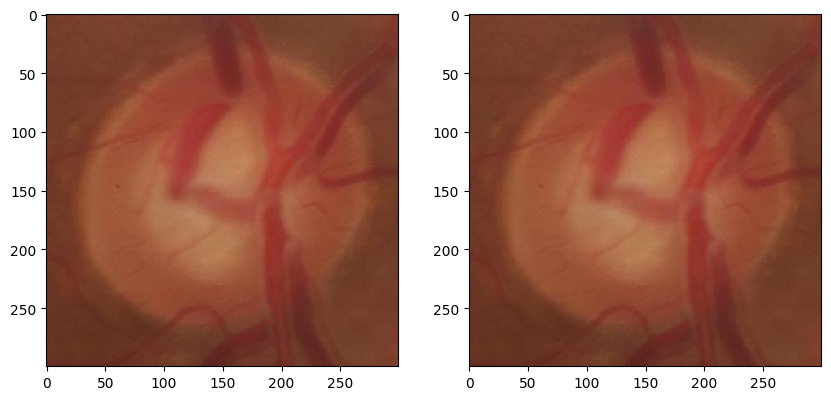

Showing g1020_normal...


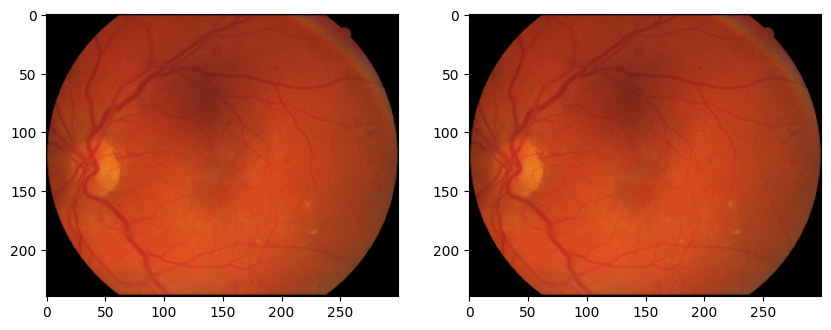

Showing g1020_glaukoma...


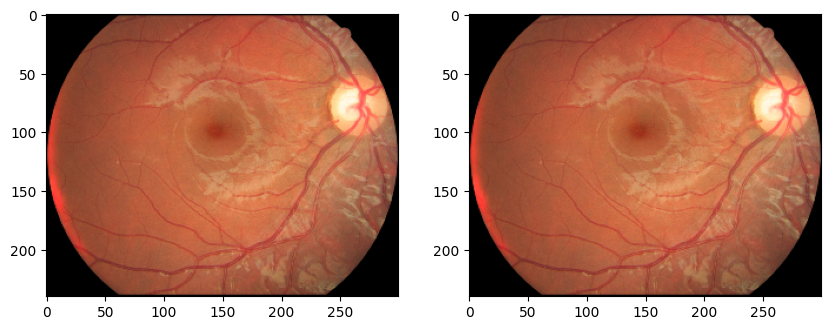

Showing refuge_normal...


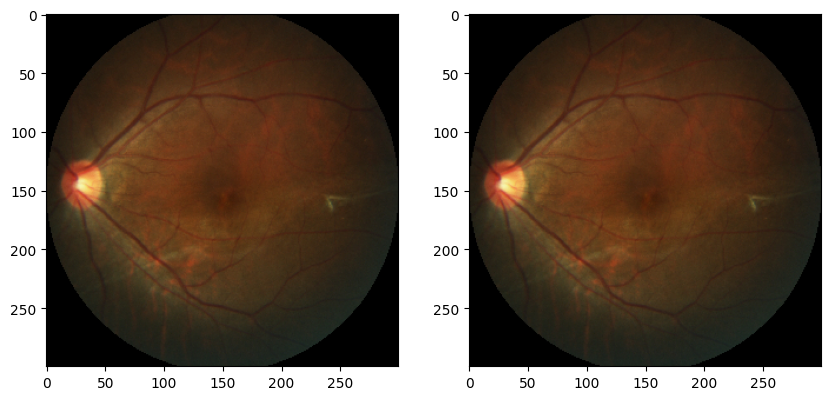

Showing refuge_glaukoma...


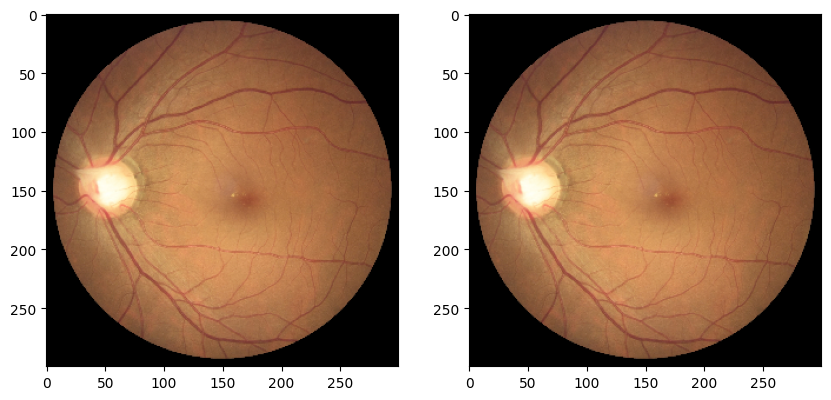

Showing papila_normal...


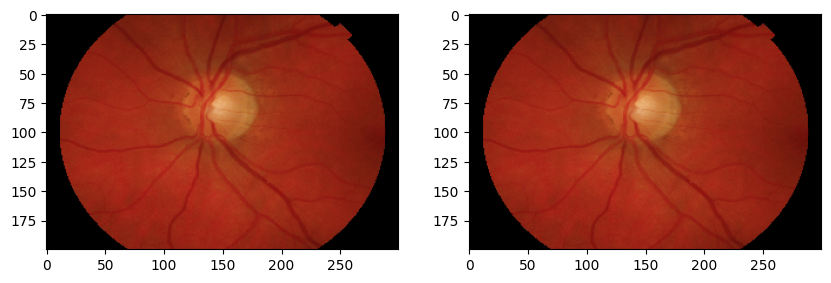

Showing papila_glaukoma...


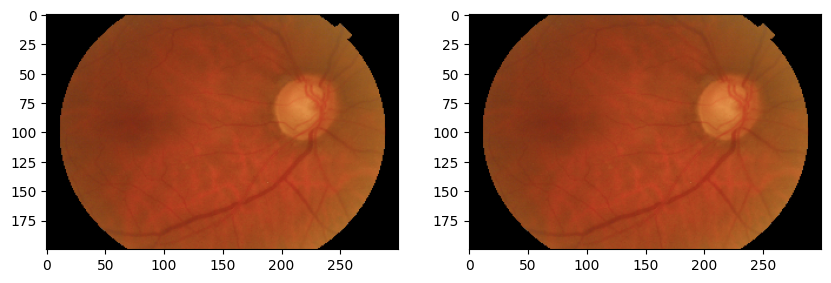

In [31]:
for dataset_name, datagen in s1_src.items():
    print(f'Showing {dataset_name}...')
    image = next(datagen)
    augment_image.show_augmented_img(image=image[0][0],
                                    augment_type=s1_augment,
                                    color_mode=s1_col_mode)
del dataset_name, datagen, image

### Scenario 2
basic augmentation, rgb color, no clahe
#### Show Image

In [7]:
os.path.join(path_dataset[f'scenario_1_rimone'],
                                            'augmented')

'd:\\\\Programming\\\\Python\\\\Skripsi\\\\dataset\\\\used\\scenario_1\\rimone\\augmented'

In [30]:
s2_src = {}
s2_augment = ['h_flip', 'v_flip', 'bright', 'rot']
s2_col_mode = 'rgb'
for dataset in dataset_names:
    for fold in folds_names:
        print(f'Loading {dataset} {fold} train data...')
        s2_src[fold + '_' +
            dataset] = datagenerator_s2345.flow_from_directory(
                    os.path.join(path_dataset[f'scenario_2_{dataset}'],
                                fold,
                                'train'),
                    target_size=image_size[dataset],
                    color_mode=s2_col_mode,
                    class_mode='binary',
                    batch_size=1500,
                    shuffle=True,
                    seed=1915026018,
                    save_to_dir=os.path.join(path_dataset[f'scenario_2_{dataset}'],
                                            fold,
                                            'train'),
                    save_prefix='augmented',
                    save_format=image_format[dataset])
del dataset, fold

Loading rimone fold_1 train data...
Found 339 images belonging to 2 classes.


Loading rimone fold_2 train data...
Found 339 images belonging to 2 classes.
Loading rimone fold_3 train data...
Found 339 images belonging to 2 classes.
Loading rimone fold_4 train data...
Found 339 images belonging to 2 classes.
Loading rimone fold_5 train data...
Found 339 images belonging to 2 classes.
Loading g1020 fold_1 train data...
Found 714 images belonging to 2 classes.
Loading g1020 fold_2 train data...
Found 714 images belonging to 2 classes.
Loading g1020 fold_3 train data...
Found 714 images belonging to 2 classes.
Loading g1020 fold_4 train data...
Found 714 images belonging to 2 classes.
Loading g1020 fold_5 train data...
Found 714 images belonging to 2 classes.
Loading refuge fold_1 train data...
Found 840 images belonging to 2 classes.
Loading refuge fold_2 train data...
Found 840 images belonging to 2 classes.
Loading refuge fold_3 train data...
Found 840 images belonging to 2 classes.
Loading refuge fold_4 train data...
Found 840 images belonging to 2 classes.
Load

In [31]:
len(s2_src['fold_1_rimone'].next()[0])

339

Showing rimone fold_1 augmented data...


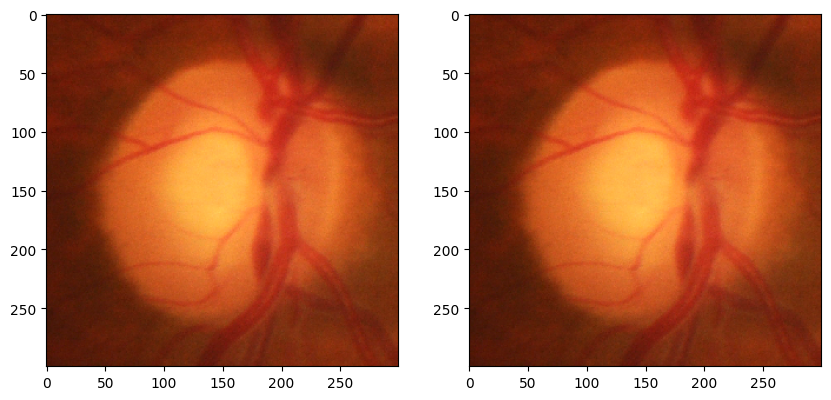

Showing g1020 fold_1 augmented data...


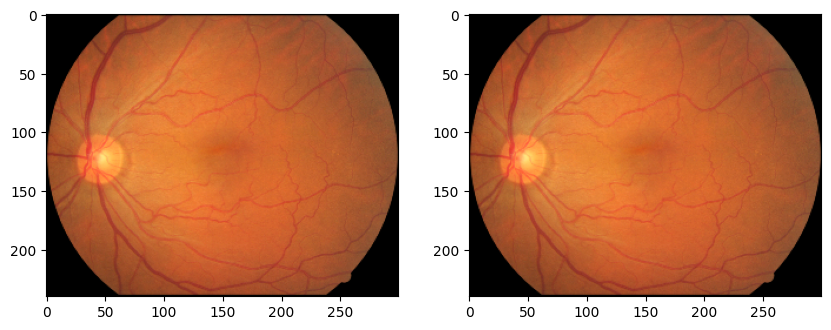

Showing refuge fold_1 augmented data...


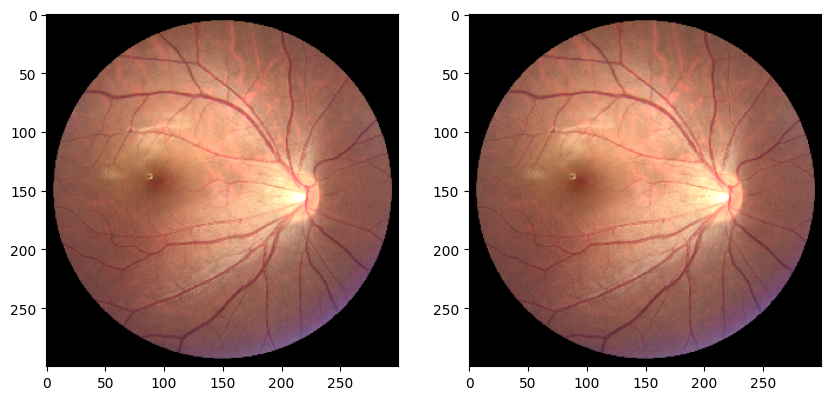

Showing papila fold_1 augmented data...


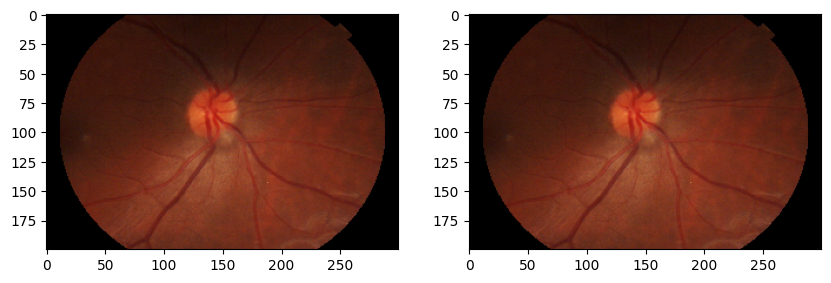

In [18]:
for dataset in dataset_names:
    for fold in folds_names:
        if fold != 'fold_1':
            break
        print(f'Showing {dataset} {fold} augmented data...')
        image = next(s2_src[fold + '_' + dataset])
        augment_image.show_augmented_img(image=image[0][0],
                                        augment_type=s2_augment,
                                        color_mode=s2_col_mode)
del dataset, fold, image
# for index, s2_src_datagen in enumerate(s1_src):
#     print(f'Showing {dataset_names[index]}...')
#     image = next(s1_src_datagen)
#     augment_image.show_augmented_img(image=image[0][0],
#                                     augment_type=s1_augment,
#                                     color_mode=s1_col_mode)
# del index, s1_src_datagen, image

### Scenario 3
basic augmentation, rgb color, clahe
#### Show Image

### Scenario 4
basic augmentation, gray, no clahe
#### Show Image

### Scenario 5
basic augmentation, gray, clahe
#### Show Image

In [9]:
import matplotlib.pyplot as plt

In [10]:
s1_rimone_src.class_indices

NameError: name 's1_rimone_src' is not defined

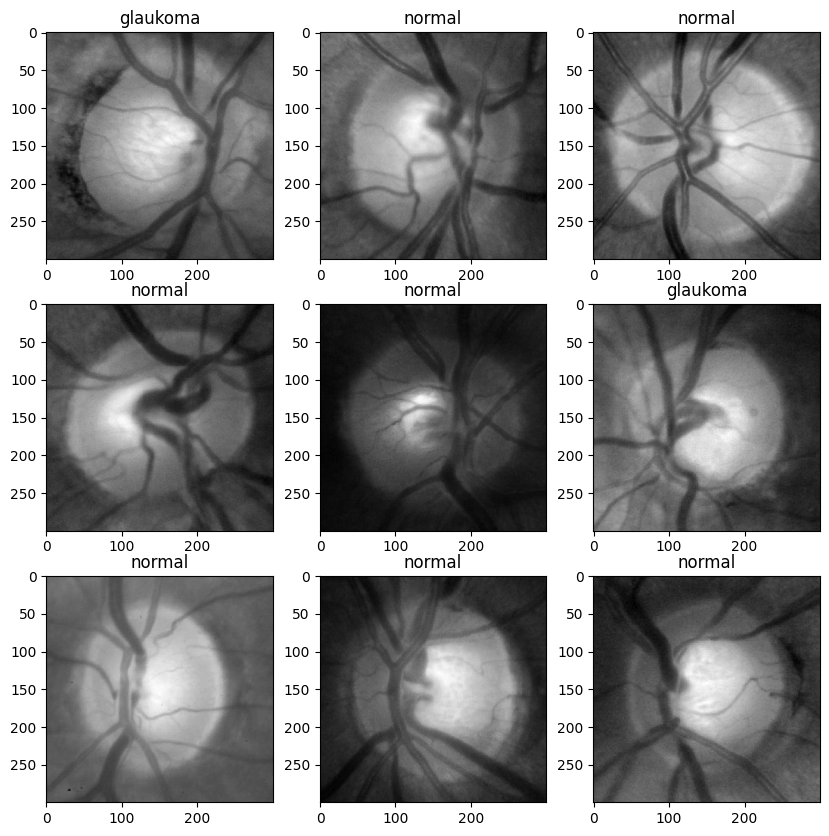

In [ ]:
fig_row = 3
fig_col = 3
position = (s1_rimone_src.batch_index - 1) * s1_rimone_src.batch_size
plt.figure(figsize=(10, 10))
image = next(s1_rimone_src)
for i in range (fig_row * fig_col):
    plt.subplot(fig_row, fig_col, i+1)
    # image = s1_rimone_src.next()
    plt.title(list(s1_rimone_src.class_indices.keys())[int(image[1][i])])
    plt.imshow(image[0][i], cmap='gray')
    # plt.title(list(s1_rimone_src.class_indices.keys())[int(s1_rimone_src[i][1][0])])
    # plt.imshow(s1_rimone_src[i][0][0])
    # plt.axis('off')